# Understanding Learning by Error Propagation

This notebook is a designed in a way such that it serves as a walkthrough for the paper [Learning Internal Representations by Error Propagation](https://apps.dtic.mil/dtic/tr/fulltext/u2/a164453.pdf) (1985) by Rumelhart D., Hinton G. and Williams R. The notebook aims to build a neural network that is learning pattern through propagating error on input/output pairs. 


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Deep-Neural-Network" data-toc-modified-id="Deep-Neural-Network-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Deep Neural Network</a></span><ul class="toc-item"><li><span><a href="#Hidden-Units" data-toc-modified-id="Hidden-Units-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Hidden Units</a></span></li><li><span><a href="#Generalized-Delta-Rule" data-toc-modified-id="Generalized-Delta-Rule-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Generalized Delta Rule</a></span></li></ul></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Implementation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Define-Error-Measure" data-toc-modified-id="Define-Error-Measure-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Define Error Measure</a></span></li><li><span><a href="#Initializing-Weights" data-toc-modified-id="Initializing-Weights-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Initializing Weights</a></span></li><li><span><a href="#Forward-Propagation" data-toc-modified-id="Forward-Propagation-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Forward Propagation</a></span></li><li><span><a href="#Backward-Propagation" data-toc-modified-id="Backward-Propagation-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Backward Propagation</a></span></li><li><span><a href="#Updating-weights" data-toc-modified-id="Updating-weights-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>Updating weights</a></span></li><li><span><a href="#Repeating-the-Procedure" data-toc-modified-id="Repeating-the-Procedure-2.0.6"><span class="toc-item-num">2.0.6&nbsp;&nbsp;</span>Repeating the Procedure</a></span></li><li><span><a href="#Step---7-Inference" data-toc-modified-id="Step---7-Inference-2.0.7"><span class="toc-item-num">2.0.7&nbsp;&nbsp;</span>Step - 7 Inference</a></span></li></ul></li></ul></li><li><span><a href="#3.-Sample-Model" data-toc-modified-id="3.-Sample-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Sample Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Learning" data-toc-modified-id="Learning-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Learning</a></span></li><li><span><a href="#Other-Datasets" data-toc-modified-id="Other-Datasets-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Other Datasets</a></span></li></ul></li></ul></li></ul></div>

**Notes**

1. To keep things simple, we will use the planar dataset for illustration and application purposes. At the end of the notebook, we will also build a network with *breast cancer* dataset.
2. To be able to make the shift from reading to understanding the idea smoother, we try to preserve the original notation from the paper which is different than the commonly used notations/names. However, we include a map of names from original notation to common notation. 
3. For whom taken the course of deeplearning.ai's [Deep Learning Specialization](https://www.coursera.org/learn/neural-networks-deep-learning), the structure of the notebook should be similar with the programming assignments with little changes in implementation.


## Deep Neural Network

Deep Neural Network term is used for neural networks with one or more hidden layers. This implementation is not based on some predefined architecture, but rather it's built for any type of architectures. The paper presented the architecture as inputs starting from bottom and fed to top, see the figure below.

<img src="assets/bottom_up_architecture.png" width="550" title="Bottom-Up Architecture">
<center>Figure 1: <em>Bottom-Up Architecture</em></center>

Although this is the original presentation from the paper, here we use left-to-right presentation rather than bottom-to-top in illustrations as it's slightly easier to apperceive, see the figure below. Also, we will make an implementation where the layer size, and number of units are configurable so the image below represents fixed layer sizes only for illustration purposes.

<img src="assets/left_right_architecture.png" width="550" title="Left-to-Right Architecture">
<center>Figure 2: <em>Left-to-Right Architecture</em></center>


### Hidden Units

Hidden unit is a network unit which is a player in generating an internal representation of input pattern. Actually, if we are speaking layer-by-layer, a layer of hidden units of size `n_h` just outputs a representation from previous layer which is input pattern if its the first layer we are speaking of. Directly quoting from the paper (Figure 1 is Figure 1 in the notebook), see the statement below about internal representation and hidden units,

> ..., if there is a layer of simple perceptron-like hidden units, as shown in Figure 1, with which the original input pattern can be augmented, there is always a recoding (i.e., an internal representation) of the input patterns in the hidden units in which the similarity of the patterns among the hidden units can support any required mapping from the input to the output units. Thus, if we have the right connections from the input units to a large enough set of hidden units, we can always find a representation that will perform any mapping from input to output through these hidden units. ...

Forward propagation by feeding hidden units with the previous layer's output $o^{l-1}$ the equations are shown below:

$$net_{pj} = \sum_{i} w_{ji} o_{pi} + \theta_j$$
where $o_{pi} = i_{pi}$ if $u_j$ is an input unit, and
$$o_{pj} = f_j(net_{pj})$$

In a vectorized form using superscript for layers the equations is as follows:

$$net^{l} = o^{l-1} w^{l} + \theta^{l}$$
where $o^l = X$ if $l = 0$ is the input layer, and
$$o^{l} = f_l(net^{l})$$


### Generalized Delta Rule

At the end of the chapter "The Problem" of the paper the authors pointed out previous work and approaches for learning in networks with hidden units. 

In the paper they introduced error function as a squared difference of target values and output values of the network. Find the section below in the paper:

>To be more specific, then, let
$E_p = \frac{1}{2} \sum_j (t_{pj} - o_{pj})^2$
be our measure of the error on input/output pattern $p$ and let $E = \sum E_p$ be our
overall measure of the error.


The proposed rule for changing the weights is as follows:

\begin{equation}
  \begin{aligned}
    \Delta_p w_{ji} &= \eta \delta_{pj} o_{pi}\\        
    \Delta_p t_{j} &= \eta \sum_k \delta_{pk}
  \end{aligned}
\end{equation}

where $\Delta_p w_{ji}$ is the change to be made, and, the part where $\delta_{pj}$ is explained is quoted below.

>The trick is to figure out what $\delta_{pj}$ should be for
each unit $u_j$ in the network. The interesting result, which we now derive, is that
there is a simple recursive computation of these $\delta$'s which can be implemented by
propagating error signals backward through the network.
>
>To compute $\delta_{pj} = -\frac{\partial E_p}{\partial {net}_{pj}}$, we apply the chain rule to write this partial derivative as the product of two factors, one factor reflecting the change in error as a function of the output of the unit and one reflecting the change in the output as a function of changes in the input. Thus, we have

>$$\delta_{pj} = -\frac{\partial E_p}{\partial {net}_{pj}} = -\frac{\partial E_p}{\partial {o}_{pj}}\frac{\partial o_{pj}}{\partial {net}_{pj}}$$

>, and $$\frac{\partial o_{pj}}{\partial {net}_{pj}} = f'_j({net}_{pj})$$

, with using $E_p$ introduced in the paper, the rule for $\delta_{pj}$ is as follows

$$\begin{equation}
\delta_{pj} = \begin{cases} \label{eq:delta_rule} \tag{1}
      (t_{pj} - o_{pj})f'_j({net}_{pj}) & \textit{if $u_j$ is an output unit} \\
      f'_j({net}_{pj})\sum_{k} \delta_{pk} w_{kj} & \textit{otherwise}
   \end{cases}
\end{equation}$$

If you have read the derivation part and followed the equations, you probably already saw that the subscripts are everywhere, that is the paper equations proceed for one unit at a time. We make a slight change here, and rather than applying loops and compute the weights, outputs, and delta item by item, we use vectorization. In vectorized form, the change of the update rule ($\Delta_p w_{ji}$) could be expressed as follows:

$$\begin{equation}
  \begin{aligned}
    \nabla w^{l} &= \eta \: \frac{1}{m} {o^{l}}^T \delta^l\\        
    \nabla \theta^{l} &= \eta \: \frac{1}{m} \: \sum_{i} \delta^{l}_{ij}
  \end{aligned}
\end{equation}$$

, and

$$\begin{equation}
\delta^{l} = \begin{cases} \label{eq:vectorized_delta_rule} \tag{2}
      (t - o^{l}) f'_l({net}^{l}) & \textit{if $l=L$} \\
      f'_l({net}^{l}) \delta^{l+1} {w^{l}}^T & \textit{otherwise}
   \end{cases}
\end{equation}$$

where $L = \textit{# of layers} - 1$ in a way that excluding the input layer. So consider L is the number of hidden layers plus the output layer. Also, note that we are going in a backward direction, i.e computing from $\delta^{4}$ for towards $\delta^{0}$ hence $\delta^{l+1}$ is the previous $\delta$ computed. It's important to note that we do not need $\delta^{0}$ as it is not used in any computation of weight changes.

, and
$\Delta w^{l}$ is the change in the weight matrix of layer $l$,
$\delta^{l}$ is the delta matrix computed at layer $l$,
$o^{l-1}$ is the output matrix of the layer $l-1$


**Notes**

- It's important to note that we use $L = \textit{# of layers} - 1$ in order to attain the index of the last layer as the $L^{th}$ layer. 
- Also note that in the delta rule we used $o^{l}$ to compute $\delta^{l}$ that's because we will include input X (i.e $i^{l}$) in both the cache of $net$ and $o$ as the starting values. Thus, we have ${net}^{0} = o^{0} = X$. You can consider it as if input data is our first $net$ values, and it's activated by a linear activation, $f(x) = x$.

## Implementation

Let's start implementing components of a network. Before jumping into the code here, in the notebook, I wanted to explicitly construct the components with functions, and avoided using a class on purpose. The main reason is for one to see how each function works, and what inputs are needed for each function. At the end, you can see the full-implementation from `./nnet.py`. After making the point, let's start building.


**Architecture**

We will build two hidden layer neural network for planar data classification. This data is also used in "week 3 programming assignment" of [Neural Networks and Deep Learning](https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning). We also want to use that dataset as well as we mentioned it at the beginning of this notebook, it makes it easier to reader to follow up what is going on and also, the network architecture will be simple. We make, however, a little change and build a two hidden layer network. The network will be as follows, where we have 2 hidden layers of sizes 6 and 3 respectively using tanh(x) activation function in both, and 1 unit in output layer we will use sigmoid as an activation function. The shape of the matrices or vectors are written in brackets, where m is the number of observations and *name_i* indicating the $i^{th}$ component of that variable.


<img src="assets/nnet_imp.png" width="450" title="Network for Implementation">
<center>Figure 3: <em>Network for Implementation</em></center>

The main steps to perform gradient descent using back propagation is as follows:

1. Define Error measure
2. Initialize weights
3. Forward Propagation
4. Backward Propagation (Find Gradients)
5. Update Weights.
6. Repeat step 3-5 for `# of epochs` times.
7. Make prediction with final weights.

**Notes**

- We used subscript p in variable names even though we are using vectorized form to make easier readability with paper.

First, import the required libraries.

In [1]:
# Scientific libraries
import numpy as np
from scipy.misc import derivative

# Loading Plotting Modules
import matplotlib.pyplot as plt

#### Define Error Measure

We will use [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) loss to measure the error between label/output pair, and we will have `error()` function to evaluate overall error. For simplicity, our error function use MSE as a loss function only, but other loss functions can be implemented for ones who'd like to try different losses. A list of some loss functions can be found [here](https://en.wikipedia.org/wiki/Category:Loss_functions).

In [2]:
def mse_loss(t_p, o_p):
    """
    Computes Mean Squared Error given target and network output.
    Vector E_p in short.
    
    Parameters
    ----------
    t_p : np.ndarray
        Target matrix/labels containing ground truth values.
        
    Returns
    -------
    loss : float
        Return all loss values for each label/output pair.
    """
    m = t_p.shape[0]
    return 1/(2*m) * (t_p - o_p)**2


def error(t_p, o_p):
    """
    Commonly known as the cost function. 
    Computing the total cost by MSE given target and output by network.
    
    Parameters
    ----------
    t_p : np.ndarray
        Target vector/labels containing ground truth values.
    o_p : np.ndarray
        Output vector generated by the network.
        
    Returns
    -------
    total_cost : float
        Overall measure of error. Sum of all losses.
    """
    # Mean Sqaured Error (MSE)
    E_p = mse_loss(t_p, o_p)
    return np.sum(E_p)


#### Initializing Weights

We will initialize weight matrices and bias vectors given layer sizes. Referring to Figure 3, you can see that our layer sizes are 2 for the input, 6 and 3 for hidden layers, 1 for the output layer (2,6,3,1), and weight shapes are (2,6), (6,3) and (3,1), and for bias vectors (1,6), (1,3) and (1,1). The pattern is obvious for shapes. So let's implement this.

For convenience we will name list of weight matrices as `W`, and later in passes single weight matrix associated with a layer as `w`. Also for list of bias vectors we use the name `T` for variable, and for single bias vector as `t`. Please do not confuse this lower case `t` with `t_p` (target variable/labels).

In [3]:
def initialize_weights(layers: list):
    """
    Randomly initialize weight matrices and bias vectors by given layer sizes.
    
    Parameters
    ----------
    layers : list
        A Python list containing layer sizes.
    
    Returns
    -------
    weights : tuple
        A tuple of size 2 containing weight matrices and bias vectors respectively.
    """
    W = [np.random.randn(layers[i], s) * 0.01 for i, s in enumerate(layers[1:])]
    T = [np.zeros((1, s)) for s in layers[1:]]

    return W, T

#### Forward Propagation

Basic forward propagation procedure, starting from the input layer feed the input through the network, and get the cache and the output of last layer. We then use it for error propagation. See the equations in chapter 1.1. for forward passes.

In [4]:
# Forward Propagation

def forward_pass(o_p, w, t, activation_func):
    """
    Performs one step of forward propagation.
    
    Parameters
    ----------
    o_p : np.ndarray
        An array containing the outputs of the layer l.
    w : np.ndarray
        Weight matrix to compute layer l+1.
    t : np.ndarray
        Bias vector to comput layer l+1.
    
    Returns
    -------
    cache : tuple
        A tuple of size 2 containing output and net for layer l+1 respectively.
    """
    net_p = np.matmul(o_p, w) + t
    o_p = activation_func(net_p)
    return o_p, net_p


def forward_propagate(input_data, W, T, activation_func, task):
    """
    Performs L step forward propagation.
    
    Parameters
    ----------
    input_data : np.ndarray
        A matrix of input data of size m,n where m and n are # of observations and # of features respectively.
    W : np.ndarray
        List of weight matrices for L layers.
    T : np.ndarray
        List of bias vectors for L layers.
    activation_func: function
        Activation function to be used to compute outputs of layers.
    task: str
        String indicating the learning task.
    
    Returns
    -------
    cache : tuple
        A tuple of size 2 containing outputs and nets for L layers.
    """
    L = len(W)
    o_ps, net_ps = [input_data], [input_data] # See Notes under 1.2.

    o_p = input_data

    for layer in range(L):
        w, t = W[layer], T[layer]
        if layer == L-1 and task == 'binary_classification':
            o_p, net_p = forward_pass(o_p, w, t, activation_func=sigmoid)
        elif layer == L-1 and task == 'regression':
            o_p, net_p = forward_pass(o_p, w, t, activation_func=linear)
        else:
            o_p, net_p = forward_pass(o_p, w, t, activation_func=activation_func)

        o_ps.append(o_p); net_ps.append(net_p)

    return o_ps, net_ps

#### Backward Propagation

Back propagation procedure as its name suggests proceeds starting from the last layer (output of last layer) in a backward (right-to-left) direction. This step is needed to compute the gradients which are later used to update the weights. See equations in chapter 1.2.

In [5]:
def backward_pass(f, net_p, delta_prev, w):
    """
    Performs one step of backward propagation.
    
    Parameters
    ----------
    f : function
        Activation function used to compute layer l.
    net_p : np.ndarray
        A net matrix computed at layer l.
    delta_prev : np.ndarray
        Delta matrix computed at layer l+1.
    w : np.ndarray
        Weight matrix at layer l.
    
    Returns
    -------
    delta_p : np.ndarray
        Matrix of delta at layer l.
    """
    dnet_p = derivative(f, net_p)
    delta_w = np.matmul(delta_prev, w.T)
    return dnet_p * delta_w


def backward_propagate(o_ps, net_ps, t_p, W, activation_func, task):
    """
    Performs L step backward propagation.
    
    Parameters
    ----------
    o_ps : list
        Outputs of layers returned by cache at forward propagation.
    net_ps : list
        Pre-outputs (before activations), nets, of layers returned by cache at forward propagation.
    t_p : np.ndarray
        Target matrix/labels containing ground truth values.
    W : np.ndarray
        List of weight matrices for L layers.
    activation_func: function
        Activation function to be used to compute outputs of layers.
    task: str
        String indicating the learning task.
    
    Returns
    -------
    grads : tuple
        Gradients for weight matrices and bias vectors respectively.
    """
    L = len(W)
    m = t_p.shape[0]
    dW, dT = [], []

    # Initialize the recursion with the output layer
    do_p = derivative(lambda x: mse_loss(t_p, x), o_ps[-1])
    dnet_p = derivative(sigmoid, net_ps[-1])
    delta_p = do_p * dnet_p

    for layer in reversed(range(L)):
        dw = np.matmul(o_ps[layer].T, delta_p)
        dt = np.sum(delta_p, axis=0, keepdims=True)

        if layer != 0: # No need to compute delta_0 (skipped for performance)
            delta_p = backward_pass(activation_func, net_p=net_ps[layer], delta_prev=delta_p, w=W[layer])

        dW.insert(0, dw); dT.insert(0, dt)

    return dW, dT

#### Updating weights

Now we are here to update the weights to reduce the error between target and output of the network (output of output layer). We need an error metric by the way.

In [6]:
def update_weights(W, T, dW, dT, eta):
    """
    Update weights given gradients and learning rate.
    
    Parameters
    ----------
    W : np.ndarray
        List of weight matrices for L layers.
    T : np.ndarray
        List of bias vectors for L layers.
    W : np.ndarray
        List of gradients for weight matrices for L layers.
    T : np.ndarray
        List of gradients for bias vectors for L layers.
    eta : float
        Learning rate.
    
    Returns
    -------
    weights : tuple
        List of updated weight matrices and bias vectors.
    """
    i = 0
    while i < len(W):
        W[i] = W[i] - eta * dW[i]
        T[i] = T[i] - eta * dT[i]
        i += 1

    return W, T

#### Repeating the Procedure

As of now, we completed the one step of forward and backward propagation process. Now, we will gather what we did in the previous steps in a function called `fit()`. The name *fit* is a widely common and accepted choice for starting the training process in most of the well-known libraries and frameworks, i.e fitting X to y.

In [30]:
def fit(X, y, layers, epochs: int = 50, learning_rate: float = 0.1, activation_func=None, task='binary_classification',
       print_cost_each=0, return_cost=False):
    """
    Build a network map from the given input data X to target y with given size of layers and parameters.
    
    Parameters
    ----------
    X : np.ndarray
        Input data to be fed into the network.
    y : np.ndarray
        Target variable/Labels for the input data.
    layers : list
        List of layer sizes of each layer in a left-to-right architecture.
    epochs : int
        Number of epochs.
    learning_rate : float
        Learning rate.
    activation_func : function
        An activation function to be used in layers except the output layer.
    task : str
        A string indicating the current task. Values `binary_classification` or `regression`.
    print_cost_each : int, default=0
        An integer to print cost value for every number specified.
    return_cost : bool, default=False
        A boolean value for whether to return the cost as a 3rd return value.
    
    Returns
    -------
    weights : tuple
        Tuple of computed final/learned weight matrices and bias vectors respectively. If return_cost is True
        the return tuple have 3 elements with the last element as the cost after the last epoch.
    """
    L = len(layers)
    layers_cp = layers.copy()
    input_size = X.shape[1]
    layers_cp.insert(0, input_size)
    W, T = initialize_weights(layers_cp)

    y = y.reshape(len(y), 1)

    if activation_func is None:
        # default to linear activation
        activation_func = linear
    elif isinstance(activation_func, list):
        assert len(activation_func) == L

    for epoch in range(epochs):
        o_ps, net_ps = forward_propagate(X, W, T, activation_func=activation_func, task=task)
        E = error(t_p=y, o_p=o_ps[-1])
        dW, dT = backward_propagate(o_ps, net_ps, y, W, activation_func=activation_func, task=task)
        W, T = update_weights(W, T, dW, dT, learning_rate)

        if print_cost_each != 0 and epoch % print_cost_each == 0:
            print(f'Epoch: {epoch} \t Cost: {E}')
    
    print(f'Epoch: {epochs} \t Cost: {E}')
    if return_cost:
        return W, T, E

    return W, T

#### Inference

Finally, after learning the parameters, we can make predictions given input data. The prediciton process is just one step of forward propagation with the weights and biases that are learned in the training process. See the predict function below

In [24]:
def predict(X, W, T, activation_func=None, task='binary_classification', return_classes=False):
    """
    Make predictions given input data X using the learned weights from fit().
    
    Parameters
    ----------
    X : np.ndarray
        Input data to be fed into the network.
    W : list
        List of learned weight matrices returned from fit().
    T : list
        List of learned bias vectors returned from fit().
    activation_func : function, default=None
        An activation function to be used in layers except the output layer. If None,
        linear activation will be used.
    task : str, default='binary_classification'
        A string indicating the current task to apply which activation function at the output layer.
        Values `binary_classification` or `regression`.
    return_classes : bool, default=False
        A boolean indicating whether to return predicted classes. If False, probabilities are returned.
    
    Returns
    -------
    y_pred : np.ndarray
        An array of predicted values for input X. If return classes binary values are returned.  
    """
    ops, _ = forward_propagate(X, W, T, activation_func=activation_func, task=task)

    if return_classes:
        return np.vectorize(lambda x: 1 if x>0.5 else 0)(ops[-1])

    return ops[-1]

## 3. Sample Model

We will build a model on a planar dataset which has two features, and has a fancy shape on a scatter plot by these two features. See the plot below.


<img src="assets/planar_scatter.png" width="450" title="Scatter plot for planar dataset">
<center>Figure 3: <em>Scatter plot of features of X by classes 0 and 1</em></center>

In [9]:
from nb_utils import load_planar_dataset, plot_decision_boundary, sigmoid, tanh
from sklearn.metrics import accuracy_score

Epoch: 0 	 Cost: 0.12500007100119653
Epoch: 1000 	 Cost: 0.12448435064000768
Epoch: 2000 	 Cost: 0.043207957278199656
Epoch: 3000 	 Cost: 0.03983250238728593
Epoch: 4000 	 Cost: 0.03846652576533849
Epoch: 5000 	 Cost: 0.03774935801182277
Epoch: 6000 	 Cost: 0.03605336374602358
Epoch: 7000 	 Cost: 0.034791310710995074
Epoch: 8000 	 Cost: 0.03323408117669907
Epoch: 9000 	 Cost: 0.03231254992888104
Epoch: 10000 	 Cost: 0.031173303110718097
Accuracy:  90.5000


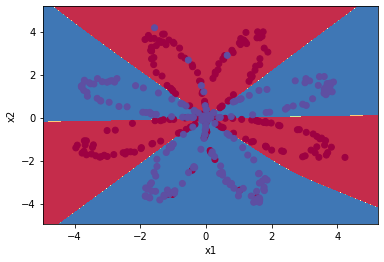

In [31]:
X, y = load_planar_dataset()

layers_ = [6,3,1]
task_ = 'binary_classification'
activation_func_ = tanh
learning_rate_ = 1.2
epochs_ = 10000

W, T = fit(X, y, layers=layers_, epochs=epochs_, learning_rate=learning_rate_, activation_func=activation_func_, task=task_,
          print_cost_each=1000)

y_pred = predict(X, W, T, activation_func_, task=task_, return_classes=True)

accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy*100: .4f}')

plot_decision_boundary(lambda x: predict(x, W, T, activation_func_, task=task_, return_classes=True), X, y)

#### Learning

Observe the plots below to see how the model learned the weights by 1000 epochs up to 10000 epochs.

Epoch: 1000 	 Cost: 0.12479758441662253
Epoch: 2000 	 Cost: 0.04250183443218512
Epoch: 3000 	 Cost: 0.04200220555475497
Epoch: 4000 	 Cost: 0.03993740888827331
Epoch: 5000 	 Cost: 0.037187992232826456
Epoch: 6000 	 Cost: 0.039444888525451006
Epoch: 7000 	 Cost: 0.0380186961490868
Epoch: 8000 	 Cost: 0.03306147349362554
Epoch: 9000 	 Cost: 0.03158648744905186
Epoch: 10000 	 Cost: 0.033195076709842265


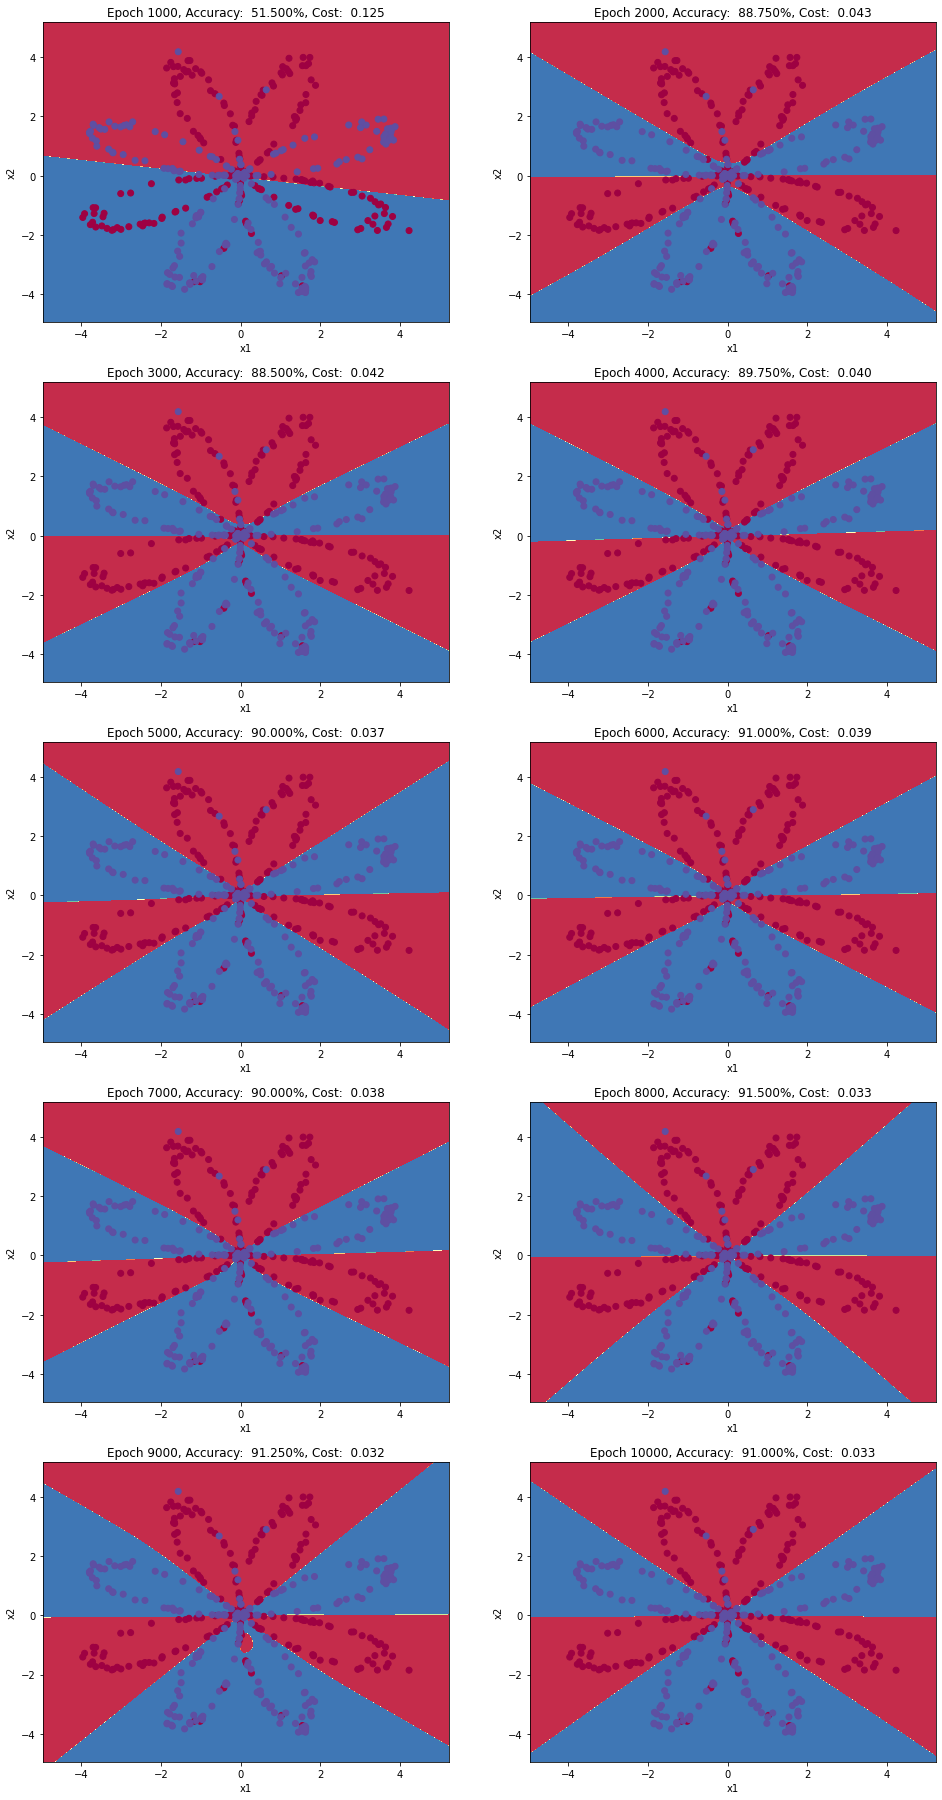

In [33]:
plt.figure(figsize=(16, 32))

for i in range(1,11): 
    plt.subplot(5, 2, i)
    epoch = i*1000
    W, T, cost = fit(X, y, layers=layers_, epochs=epoch, learning_rate=learning_rate_, activation_func=activation_func_, 
               task=task_, print_cost_each=0, return_cost=True)

    y_pred = predict(X, W, T, activation_func_, task=task_, return_classes=True)

    accuracy = accuracy_score(y, y_pred)

    plot_decision_boundary(lambda x: predict(x, W, T, activation_func_, task=task_, return_classes=True), X, y)
    plt.title(f'Epoch {epoch}, Accuracy: {accuracy*100: .3f}%, Cost: {cost: .3f}')

#### Other Datasets

Let's build a network on another dataset, and as we mentioned from the beginning of the notebook, we will use the [breast cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) from sklearn for simplicity as a classification task, and [boston dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) as a regression task. For the implementations of neural nets for these datasets, see [this notebook](./example_datasets.ipynb) You can try the network on different datasets, and make predictions. We again do not make predictions with unseen data, one can do it if she/he wishes to do with using the simple predict function. Also, we are going to use a bigger network now, with 2 hidden layers with 40 and 20 units respectively. Also, notice that we use different *learning rate*, *activation function* and *number of epochs*.